# Evaluating language models

This section introduces you to some basic techniques for evaluating the results of natural language processing.

After reading this section, you should:

- understand what is meant by a gold standard
- know how to evaluate agreement between human annotators
- understand simple metrics for evaluating the performance of natural language processing

## What is a gold standard?

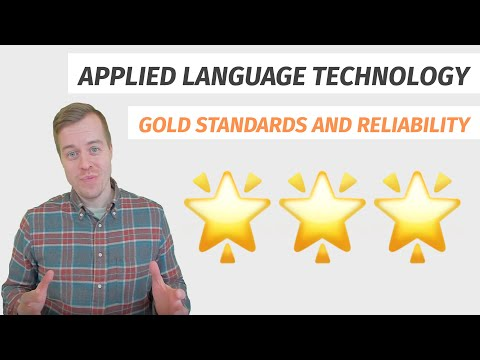

In [1]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('eBJDxHUxRwc', height=350, width=600)

A gold standard – also called a ground truth – refers to human-verified data that can used as a benchmark for evaluating the performance of algorithms. 

In natural language processing, gold standards are used to measure how well humans perform on some task.

The goal of natural language processing is to allow computers to achieve or surpass human-level performance in some pre-defined task. 

Measuring whether algorithms can do so requires a benchmark, which is provided by the gold standard. Put simply, a gold standard provides a point of reference.

It is important, however, to understand that gold standards are *abstractions* of language use. 

Consider, for instance, the task of placing words into word classes: word classes are not given to us by nature, but represent an abstraction that imposes structure on natural language.

Language, however, is naturally ambiguous and subjective, and the abstractions used can be underdeveloped – we cannot be sure if all users would categorise words in the same way.

This is why we need to measure the reliability of any gold standard, that is, to what extent humans agree on the task.

## Measuring reliability manually

This section introduces how reliability, often understood as agreement between multiple annotators, can be measured manually.

### Step 1: Annotate data

Sentiment analysis is a task that involves determining the sentiment of a text (for an useful overview that incorporates insights from both linguistics and natural language processing, see [Taboada](https://doi.org/10.1146/annurev-linguistics-011415-040518) (2016).

Training a sentiment analysis model requires collecting training data, that is, examples of texts associated with different sentiments.

Classify the following tweets into three categories – *positive*, *neutral* or *negative* – based on their sentiment.

Write down your decision – one per row – but **do not discuss them or show them to the person next to you.**

```
1. Updated: HSL GTFS (Helsinki, Finland) https://t.co/fWEpzmNQLz
2. current weather in Helsinki: broken clouds, -8°C 100% humidity, wind 4kmh, pressure 1061mb
3. CNN: "WallStreetBets Redditors go ballistic over GameStop's sinking share price"
4. Baana bicycle counter. Today: 3 Same time last week: 1058 Trend: ↓99% This year: 819 518 Last year: 802 079 #Helsinki #cycling
5. Elon Musk is now tweeting about #bitcoin 
6. A perfect Sunday walk in the woods just a few steps from home.
7. Went to Domino's today👍 It was so amazing and I think I got damn good dessert as well…
8. Choo Choo 🚂 There's our train! 🎉 #holidayahead
9. Happy women's day ❤️💋 kisses to all you beautiful ladies. 😚 #awesometobeawoman
10. Good morning #Helsinki! Sun will rise in 30 minutes (local time 07:28)
```

Double-click this cell to edit its contents and write down your classifications below:

    1.neutral
    2.neutral
    3.negative
    4.neutral
    5.neutral
    6.positive
    7.positive
    8.positive
    9.positive
    10.neutral

### Step 2: Calculate percentage agreement

When creating datasets for training models, we typically want the training data to be reliable, that is, so that we agree on whatever we are describing – in this case, the sentiment of the tweets above.

One way to measure this is simple *percentage agreement*, that is, how many times out of 10 you and the person next to you agreed on the sentiment of a tweet.

Now compare your results calculate percentage agreement by dividing the number of times you agreed by the number of items (10).

You can calculate percentage agreement by executing the cell below: just assign the number items you agree on to the variable `agreement`. 

In [2]:
# Replace this number here with the number of items you agreed on
agreement = 9

# Divide the count by the number of tweets
agreement = agreement / 10

# Print out the variable
agreement

0.9

### Step 3: Calculate probabilities for each category

Percentage agreement is actually a very poor measure of agreement, as either of you may have made lucky guesses – or perhaps you considered the task boring and classified every tweet into a random category.

If you did, we have no way of knowing this, as percentage agreement cannot tell us if the result occurred by chance!

Luckily, we can estimate the possibility of *chance agreement* easily.

The first step is to count *how many times you used each available category* (positive, neutral or negative).

Assign these counts in the variables below.

In [3]:
# Count how many items *you* placed in each category
positive = 4
neutral = 5
negative = 1

We can convert these counts into *probabilities* by dividing them with the total number of tweets classified.

In [4]:
positive = positive / 10
neutral = neutral / 10
negative = negative / 10

# Call each variable to examine the output
positive, neutral, negative

(0.4, 0.5, 0.1)

These probabilities represent the chance of *you* choosing that particular category.

Now ask the person sitting next to you for their corresponding probabilities and tell them yours as well. 

Add their probabilities to the variables below.

In [5]:
nb_positive = 4
nb_neutral = 4
nb_negative = 2
nb_positive/= 10
nb_neutral /= 10
nb_negative /= 10

Now that we know the probabilities for each class for both annotators, we can calculate the probability that both annotators choose the same category by chance.

This is easy: for each category, simply multiply your probability with the corresponding probability from the person next to you.

If either annotator did not assign a single tweet into a category, e.g. negative, and the other annotator did, then this effectively rules out the possibility of agreeing by chance (multiplication by zero results in zero).

In [6]:
both_positive = positive * nb_positive
both_neutral = neutral * nb_neutral
both_negative = negative * nb_negative
both_positive,both_neutral,both_negative

(0.16000000000000003, 0.2, 0.020000000000000004)

### Step 4: Estimate chance agreement

Now we are ready to calculate how likely you are to agree by chance.

This is known as *expected agreement*, which is calculated by summing up your combined probabilities for each category.

In [7]:
expected_agreement = both_positive + both_neutral + both_negative

expected_agreement

0.38000000000000006

Now that we know both observed percentage agreement (`agreement`) and the agreement expected by chance (`expected_agreement`), we can use this information for a more reliable measure of *agreement*.

One such measure is [Cohen's kappa](https://en.wikipedia.org/wiki/Cohen%27s_kappa) ($\kappa$), which estimates agreement on the basis of both observed and expected agreement.

The formula for Cohen's $\kappa$ is as follows:

$\kappa = \frac{P_{observed} - P_{expected}}{1 - P_{expected}}$

As all this information is stored in our variables `agreement` and `expected_agreement`, we can easily count the $\kappa$ score using the code below.

Note that we must wrap the subtractions into parentheses to perform them before division.

In [8]:
kappa = (agreement - expected_agreement) / (1 - expected_agreement)

kappa

0.838709677419355

This gives us the result for Cohen's $\kappa$.

Let's now consider how to interpret its value.

## Cohen's kappa as a measure of agreement

The theoretical value Cohen's $\kappa$ runs from $-1$ indicating perfect disagreement to $+1$ for perfect agreement, with $0$ standing for completely random agreement.

The $\kappa$ score is often interpreted as a measure of the strength of agreement.

[Landis and Koch](https://doi.org/10.2307/2529310) (1977) famously proposed the following benchmarks, which should nevertheless be taken with a pinch of salt as the divisions are completely arbitrary.

| Cohen's K | Strength of agreement|
|-----------|----------------------|
| <0.00     | Poor                 |
| 0.00–0.20 | Slight               |
| 0.21–0.40 | Fair                 |
| 0.41–0.60 | Moderate             |
| 0.61–0.80 | Substantial          |
| 0.81–1.00 | Almost perfect       |

Cohen's $\kappa$ can be used to measure agreement between **two** annotators and the categories available must be **fixed** in advance. 

For measuring agreement between more than two annotators, one must use a measure such as [Fleiss'](https://en.wikipedia.org/wiki/Fleiss%27_kappa) $\kappa$.

Cohen's $\kappa$ and many more measures of agreement are implemented in various Python libraries, so one rarely needs to perform the calculations manually.

The [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html#sklearn.metrics.cohen_kappa_score) library (`sklearn`), for instance, includes an implementation of Cohen's $\kappa$.

Let's import the `cohen_kappa_score()` function for calculating Cohen's $\kappa$ from scikit-learn.

This function takes two *lists* as input and calculates the $\kappa$ score between them.

In [9]:
# Import the cohen_kappa_score function from the 'metrics' module of the scikit-learn library
from sklearn.metrics import cohen_kappa_score

We can then define two lists of part-of-speech tags, which make up our toy example for calculating Cohen's $\kappa$.

In [10]:
# Define two lists named 'a1' and 'a2'
a1 = ['ADJ', 'AUX', 'NOUN', 'VERB', 'VERB']
a2 = ['ADJ', 'VERB', 'NOUN', 'NOUN', 'VERB']

The next step is to feed the two lists, `a1` and `a2`, to the `cohen_kappa_score()` function.

In [11]:
# Use the cohen_kappa_score() function to calculate agreement between the lists
cohen_kappa_score(a1, a2)

0.44444444444444453

According to the benchmark from Landis and Koch, this score would indicate moderate agreement.

Generally, Cohen's $\kappa$ can be used for measuring agreement on all kinds of tasks that involve placing items into categories.

It is rarely necessary to annotate the whole dataset when measuring agreement – a random sample is often enough.

If Cohen's $\kappa$ suggests that the human annotators agree on whatever they are categorising, we can assume that the annotations are *reliable* in the sense that they are not random.

However, all measures of inter-annotator agreement, Cohen's $\kappa$ included, are affected by their underlying assumptions about what agreement is and how it is calculated. In other words, these measures never represent the absolute truth (see e.g. Di Eugenio & Glass [2004](https://dx.doi.org/10.1162/089120104773633402); Artstein & Poesio [2008](https://doi.org/10.1162/coli.07-034-R2)).

## Evaluating the performance of language models

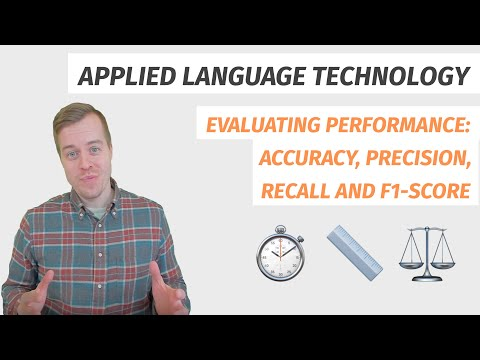

In [12]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('WiN5JCueeFQ', height=350, width=600)

Once we have a sufficiently *reliable* gold standard, we can use the gold standard to measure the performance of language models.

Let's assume that we have a reliable gold standard consisting of 10 tokens annotated for their part-of-speech tags.

These part-of-speech tags are given in the list `gold_standard`.

In [13]:
# Define a list named 'gold_standard'
gold_standard = ['ADJ', 'ADJ', 'AUX', 'VERB', 'AUX', 'NOUN', 'NOUN', 'ADJ', 'DET', 'PRON']

We then retrieve the predictions for the same tokens from some language model and store them in a list named `predictions`.

In [14]:
# Define a list named 'predictions'
predictions = ['NOUN', 'ADJ', 'AUX', 'VERB', 'AUX', 'NOUN', 'VERB', 'ADJ', 'DET', 'PROPN']

Now that we have a toy data set with two sets of annotations to compare, let's import the entire *metrics* module from the *scikit-learn* library and apply them to our data.

This module contains implementations for [various evaluation metrics](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [15]:
# Import the 'metrics' module from the scikit-learn library (sklearn)
from sklearn import metrics

First of all, we can calculate [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) using the `accuracy_score()` function, which is precisely the same as observed agreement that we calculated manually above.

This function takes two lists as input.

In [16]:
# Use the accuracy_score() function from the 'metrics' module
metrics.accuracy_score(gold_standard, predictions)

0.7

Accuracy, however, suffers from the same shortcoming as observed agreement – the output of the language model in `predictions` may be the result of making a series of lucky guesses.

However, given that we are working with a toy example, we can easily verify that 7 out of 10 part-of-speech tags match. This gives an accuracy of 0.7 or 70%.

To better evaluate the performance of the language model against our gold standard, the results can be organised into what is called a *confusion matrix*.

To do so, we need all part-of-speech tags that occur in `gold_standard` and `predictions`.

We can easily collect unique part-of-speech tags using the `set()` function.

The result is a _set_, a powerful data structure in Python, which consists of a collection of unique items.

Essentially, we use a set to remove duplicates in the two lists `gold_standard` and `predictions`.

In [17]:
# Collect unique POS tags into a set by combining the two lists
pos_tags = set(gold_standard + predictions)

# Sort the set alphabetically and cast the result into a list
pos_tags = list(sorted(pos_tags))

# Print the resulting list
pos_tags

['ADJ', 'AUX', 'DET', 'NOUN', 'PRON', 'PROPN', 'VERB']

We can use these unique categories to compile a table, in which the rows stand for the gold standard and the columns stand for predictions made by the language model. Having collected all unique part-of-speech tags at hand ensures that we can always find a place for each item.

This kind of table is commonly called a *confusion matrix*.

The table is populated by simply walking through each pair of items in the gold standard and model predictions, adding $+1$ to the cell for this combination.

For example, the first item in `gold_standard` is ADJ, whereas the first item in `predictions` is NOUN.

In [18]:
# Print out the first item in each list
gold_standard[0], predictions[0]

('ADJ', 'NOUN')

We then find the row for ADJ and the column for NOUN and add one to this cell.

   |       | ADJ | AUX | DET | NOUN | PRON | PROPN | VERB |
   |-------|-----|-----|-----|------|------|-------|------|
   | ADJ   | 2   | 0   | 0   | 1    | 0    | 0     | 0    |  
   | AUX   | 0   | 2   | 0   | 0    | 0    | 0     | 0    |
   | DET   | 0   | 0   | 1   | 0    | 0    | 0     | 0    |
   | NOUN  | 0   | 0   | 0   | 1    | 0    | 0     | 1    |
   | PRON  | 0   | 0   | 0   | 0    | 0    | 1     | 0    |
   | PROPN | 0   | 0   | 0   | 0    | 0    | 0     | 0    |
   | VERB  | 0   | 0   | 0   | 0    | 0    | 0     | 1    |

As you can see, the correct predictions form a roughly diagonal line across the table.

We can use the table to derive two additional metrics for each class: *precision* and *recall*.

Precision is the *proportion of correct predictions per class*. In plain words, precision tells you how many predictions were correct for each class, or part-of-speech tag.

For example, the sum for column VERB is $2$, of which $1$ prediction is correct (that which is located in the row VERB).

Hence precision for VERB is $1 / 2 = 0.5$ – half of the tokens predicted to be verbs were classified correctly. The same holds true for NOUN, as the column sums up two $2$, but only $1$ prediction is in the correct row.

Recall, in turn, gives the proportion of correct predictions for all examples of that class. 

Put differently, recall tells you *how many actual instances of a given class the model was able to "find"*.

For example, the sum for row ADJ is $3$: there are three adjectives in the gold standard, but only two are located in the corresponding column for ADJ.

This means that recall for ADJ is $2 / 3 = 0.66$ – approximately 66% of the adjectives present in the gold standard were classified correctly. For NOUN, recall is $1 / 2 = 0.5$.

The *scikit-learn* library provides a `confusion_matrix()` function for automatically generating confusion matrices. 

Run the cell below and compare the output to the manually created confusion matrix above.

In [19]:
# Calculate a confusion matrix for the two lists and print the result
print(metrics.confusion_matrix(gold_standard, predictions))

[[2 0 0 1 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 1]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]]


To evaluate the ability of the language model to predict the correct part-of-speech tag, we can use [*precision*](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), which is implemented in the `precision_score()` function in the *scikit-learn* library.

Because we have more than two classes for part-of-speech tags instead of just two (binary) classes, we must define how the results for each class are processed.

This option is set using the `average` argument of the `precision_score()` function. If we set `average` to `None`, the `precision_score()` function calculates precision for each class. 

We also set the `zero_division` argument to tell the function what to do if the classes found in `predictions` are not present in `gold_standard`. This prevents calculating a precision score: `zero_division` sets the precision score to 0 in these cases.

The results are organised according to a sorted *set* of labels present in `gold_standard` and `predictions`.

In [20]:
# Calculate precision between the two lists for each class (part-of-speech tag)
precision = metrics.precision_score(gold_standard, predictions, average=None, zero_division=0)

# Call the variable to examine the result
precision

array([1. , 1. , 1. , 0.5, 0. , 0. , 0.5])

The output is a [NumPy](https://www.numpy.org) array. NumPy is a powerful library for working with numerical data which can be found under the hood of many Python libraries.

If we want to combine our list of labels in `pos_tags` with the precision scores in `precision`, we can do this using Python's `zip()` function, which joins together lists and/or arrays of the same size. To view the result, we must cast it into a dictionary using `dict()`.

In [21]:
# Combine the 'pos_tags' set with the 'precision' array using the zip()
# function; cast the result into a dictionary
dict(zip(pos_tags, precision))

{'ADJ': 1.0,
 'AUX': 1.0,
 'DET': 1.0,
 'NOUN': 0.5,
 'PRON': 0.0,
 'PROPN': 0.0,
 'VERB': 0.5}

If we want to get single precision score for all classes, we can use the option given by the string `'macro'`, which means that each class is treated as equally important regardless of how many instances belonging to this class can be found in the data.

In [22]:
# Calculate precision between the two lists and take their average
macro_precision = metrics.precision_score(gold_standard, predictions, average='macro', zero_division=0)

# Call the variable to examine the result
macro_precision

0.5714285714285714

The macro-averaged precision score is calculated by summing up the precision scores and dividing them by the number of classes.

We can easily verify this manually.

In [23]:
# Calculate macro-average precision manually by summing the precision 
# scores and dividing the result by the number of classes in 'precision'
sum(precision) / len(precision)

0.5714285714285714

Calculating recall is equally easy using the `recall_score()` function from the *scikit-learn* library.

In [24]:
# Calculate recall between the two lists for each class (part-of-speech tag)
recall = metrics.recall_score(gold_standard, predictions, average=None, zero_division=0)

# Combine the 'pos_tags' set with the 'recall' array using the zip()
# function; cast the result into a dictionary
dict(zip(pos_tags, recall))

{'ADJ': 0.6666666666666666,
 'AUX': 1.0,
 'DET': 1.0,
 'NOUN': 0.5,
 'PRON': 0.0,
 'PROPN': 0.0,
 'VERB': 1.0}

The *scikit-learn* library provides a very useful function for providing an overview of classification performance called `classification_report()`.

This will give you the precision and recall scores for each class, together with the [F1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), which is a balanced average of precision and recall, that is, both precision and recall contribute equally to the F1-score. The values for the F1-score run from $0$ to $1$.

In [25]:
# Print out a classification report
print(metrics.classification_report(gold_standard, predictions, zero_division=0))

              precision    recall  f1-score   support

         ADJ       1.00      0.67      0.80         3
         AUX       1.00      1.00      1.00         2
         DET       1.00      1.00      1.00         1
        NOUN       0.50      0.50      0.50         2
        PRON       0.00      0.00      0.00         1
       PROPN       0.00      0.00      0.00         0
        VERB       0.50      1.00      0.67         1

    accuracy                           0.70        10
   macro avg       0.57      0.60      0.57        10
weighted avg       0.75      0.70      0.71        10



As you can see, the macro-averaged scores on the row *macro avg* correspond to those that we calculated above.

Finally, the weighted averages account for the number of instances in each class when calculating the average. The column *support* counts the number of instances observed for each class.

This section should have given you an idea how to assess the reliability of human annotations, and how reliable annotations can be used as a gold standard for benchmarking the performance of natural language processing. 

You should also understand certain basic metrics used for benchmarking performance, such as accuracy, precision, recall and F1-score.

In the [following section](../part_ii/06_managing_data.ipynb), you will learn about managing textual data.